# Homework7 by group3

Authors:Kaiyang LIN,Tianhao MOU,Lin LIU,Yunxia SHI,Guangyi NING

### Exercise 1

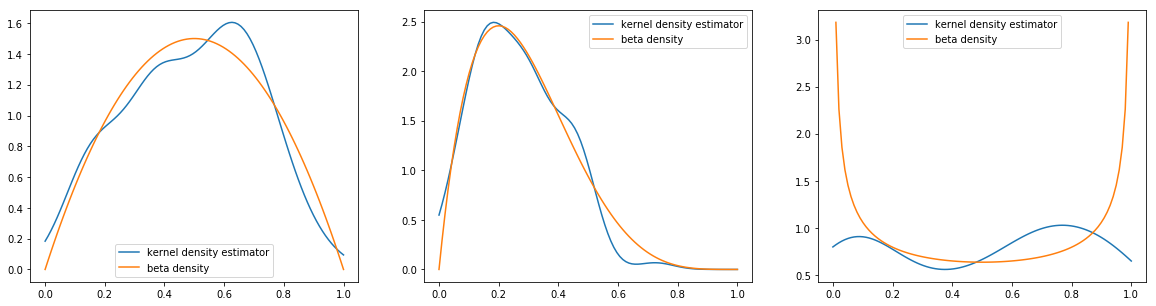

Time used: 0.40560078620910645


In [1]:
#Don't use numba
import numpy as np
from scipy.stats import norm 
from scipy.stats import beta
import matplotlib.pyplot as plt
import time

start = time.time()
class kernel_density_estimator:
    def __init__(self,X,h=0):
        self.X=X
        if h==0:
            h=1.06*np.std(self.X)*(np.size(self.X))**(-1/5) #default value:rule of thumb 
        self.h=h
        
    def kernel_density(self,x):
        return (np.sum(norm.pdf((x-self.X)/self.h)))/(self.h*np.size(self.X))
        
#ϕ is the beta distribution 
n=100
x=np.linspace(0,1,100)
fig,ax=plt.subplots(1,3,figsize=(20,5))
j=0

def create_sample(a, b, x):
    sample=beta.rvs(a,b,size=n)
    kernel=kernel_density_estimator(sample)
    estimator=[]
    for i in x:
        estimator.append(kernel.kernel_density(i))
    return estimator

def plot_distribute(x , list, a, b, j):
    ax[j].plot(x, list, label = 'kernel density estimator')
    ax[j].plot(x,beta.pdf(x,a,b),label='beta density')
    ax[j].legend(loc='best')
    
    
sample_1 = create_sample(2 , 2, x )
plot_distribute(x , sample_1, 2, 2, 0 )

sample_2 = create_sample(2 , 5, x )
plot_distribute(x , sample_2, 2, 5, 1 )

sample_3 = create_sample(0.5 , 0.5, x )
plot_distribute(x , sample_3, 0.5, 0.5, 2 )

plt.show()

end = time.time()
print ('Time used:',end - start)

## Comment:

###  In this part, we choose the bandwidth using the rule of thumb. We find that in the first two plots, the kernel density estimator is a good estimator of the corresponding distributions. But in the last plot,the kernel density estimator does not perform well. We know that kernel density estimator can yield widely inaccurate estimates when the density is not close to being normal. And the beta distribution with  α=β=0.5 is a heavy-tailed distribution which is quite different from normal distribution. So the estimator behaves badly in the last plot.

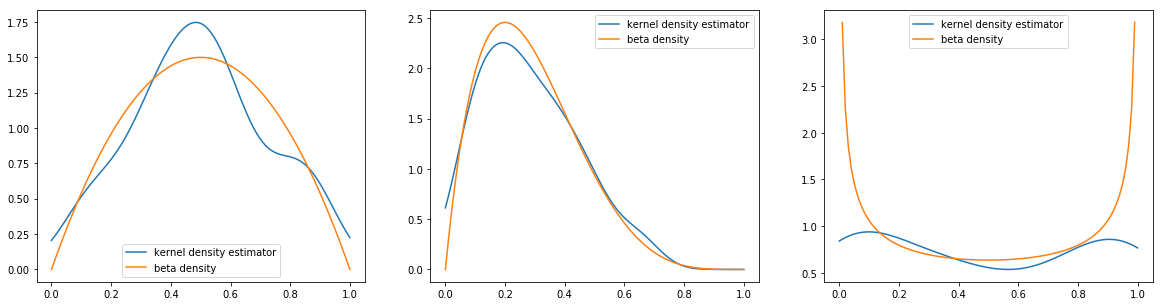

Time used: 0.6406087875366211


In [60]:
#Try to accelerate with vectorize
import numpy as np
from scipy.stats import norm 
from scipy.stats import beta
import matplotlib.pyplot as plt
import numba

start = time.time()

@numba.vectorize
def pf(h ,sx, nx):
    if h==0:
        return 1.06*sx*(nx)**(-1/5) #default value:rule of thumb 
    else:
        return h

class kernel_density_estimator:
    def __init__(self,X,h=0):
        self.X=X
        self.h = pf(h ,np.std(self.X),np.size(self.X)) 
        
    def kernel_density(self,x):
        return (np.sum(norm.pdf((x-self.X)/self.h)))/(self.h*np.size(self.X))
        
#ϕ is the beta distribution 
n=100
x=np.linspace(0,1,100)
fig,ax=plt.subplots(1,3,figsize=(20,5))

def create_sample(a, b, x):
    sample=beta.rvs(a,b,size=n)
    kernel=kernel_density_estimator(sample)
    estimator=[]
    for i in x:
        estimator.append(kernel.kernel_density(i))
    return estimator

def plot_distribute(x , list, a, b, j):
    ax[j].plot(x, list, label = 'kernel density estimator')
    ax[j].plot(x,beta.pdf(x,a,b),label='beta density')
    ax[j].legend(loc='best')
    
    
sample_1 = create_sample(2 , 2, x )
plot_distribute(x , sample_1, 2, 2, 0 )

sample_2 = create_sample(2 , 5, x )
plot_distribute(x , sample_2, 2, 5, 1 )

sample_3 = create_sample(0.5 , 0.5, x )
plot_distribute(x , sample_3, 0.5, 0.5, 2 )

plt.show()

end = time.time()
print ('Time used:',end - start)

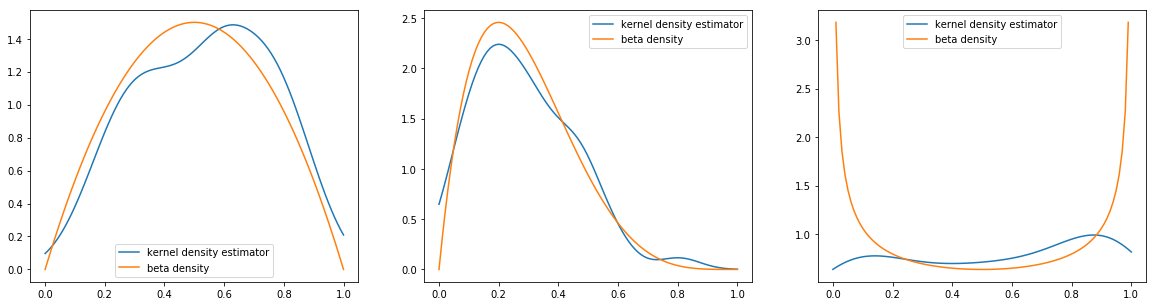

Time used: 0.7500030994415283


In [61]:
#Try to accelerate with jit
import numpy as np
from scipy.stats import norm 
from scipy.stats import beta
import matplotlib.pyplot as plt
import numba

start = time.time()

@numba.jit
def vf(h ,X):
    if h==0:
        return 1.06*np.std(X)*(np.size(X))**(-1/5) #default value:rule of thumb 
    else:
        return h

class kernel_density_estimator:
    def __init__(self,X,h=0):
        self.X=X
        self.h = vf(h ,self.X)
        
    def kernel_density(self,x):
        return (np.sum(norm.pdf((x-self.X)/self.h)))/(self.h*np.size(self.X))
        
#ϕ is the beta distribution 
n=100
x=np.linspace(0,1,100)
fig,ax=plt.subplots(1,3,figsize=(20,5))

def create_sample(a, b, x):
    sample=beta.rvs(a,b,size=n)
    kernel=kernel_density_estimator(sample)
    estimator=[]
    for i in x:
        estimator.append(kernel.kernel_density(i))
    return estimator

def plot_distribute(x , list, a, b, j):
    ax[j].plot(x, list, label = 'kernel density estimator')
    ax[j].plot(x,beta.pdf(x,a,b),label='beta density')
    ax[j].legend(loc='best')
    
    
sample_1 = create_sample(2 , 2, x )
plot_distribute(x , sample_1, 2, 2, 0 )

sample_2 = create_sample(2 , 5, x )
plot_distribute(x , sample_2, 2, 5, 1 )

sample_3 = create_sample(0.5 , 0.5, x )
plot_distribute(x , sample_3, 0.5, 0.5, 2 )

plt.show()

end = time.time()
print ('Time used:',end - start)

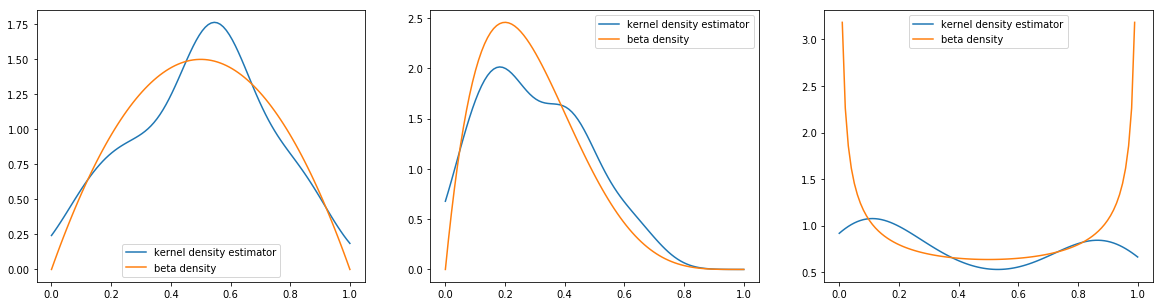

Time used: 0.7343654632568359


In [62]:
#Try to accelerate with parallel execution
import numpy as np
from scipy.stats import norm 
from scipy.stats import beta
import matplotlib.pyplot as plt
import numba

start = time.time()

@numba.vectorize('float64(float64,float64,float64)', target='parallel')
def pf(h ,sx, nx):
    if h==0:
        return 1.06*sx*(nx)**(-1/5) #default value:rule of thumb 
    else:
        return h

class kernel_density_estimator:
    def __init__(self,X,h=0):
        self.X=X
        self.h = pf(h ,np.std(self.X),np.size(self.X)) 
        
    def kernel_density(self,x):
        return (np.sum(norm.pdf((x-self.X)/self.h)))/(self.h*np.size(self.X))
        
#ϕ is the beta distribution 
n=100
x=np.linspace(0,1,100)
fig,ax=plt.subplots(1,3,figsize=(20,5))

def create_sample(a, b, x):
    sample=beta.rvs(a,b,size=n)
    kernel=kernel_density_estimator(sample)
    estimator=[]
    for i in x:
        estimator.append(kernel.kernel_density(i))
    return estimator

def plot_distribute(x , list, a, b, j):
    ax[j].plot(x, list, label = 'kernel density estimator')
    ax[j].plot(x,beta.pdf(x,a,b),label='beta density')
    ax[j].legend(loc='best')
    
    
sample_1 = create_sample(2 , 2, x )
plot_distribute(x , sample_1, 2, 2, 0 )

sample_2 = create_sample(2 , 5, x )
plot_distribute(x , sample_2, 2, 5, 1 )

sample_3 = create_sample(0.5 , 0.5, x )
plot_distribute(x , sample_3, 0.5, 0.5, 2 )

plt.show()

end = time.time()
print ('Time used:',end - start)

**The above tests show that the timing is not much improved and even slower because the individual tasks are relatively small, and hence multiple threads are not efficiently exploited.Therefoer the power of vectorization can't be shown.So sad!**

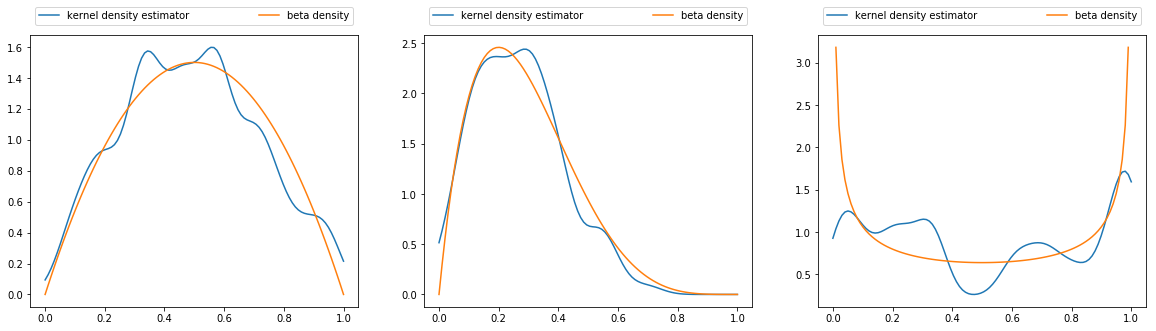

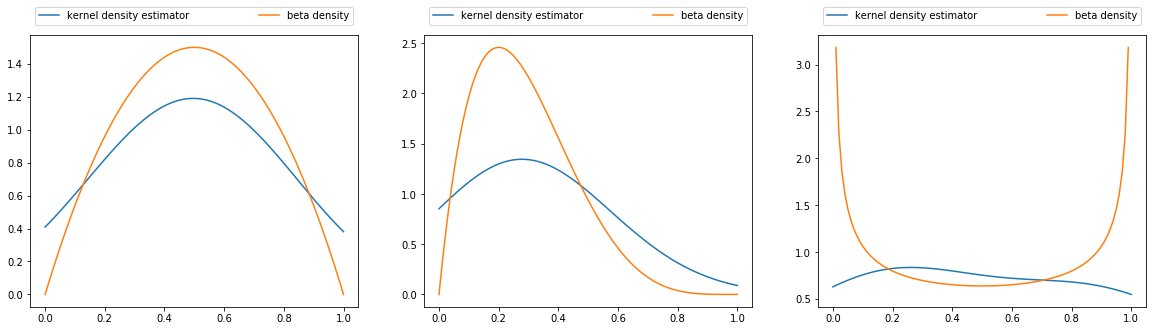

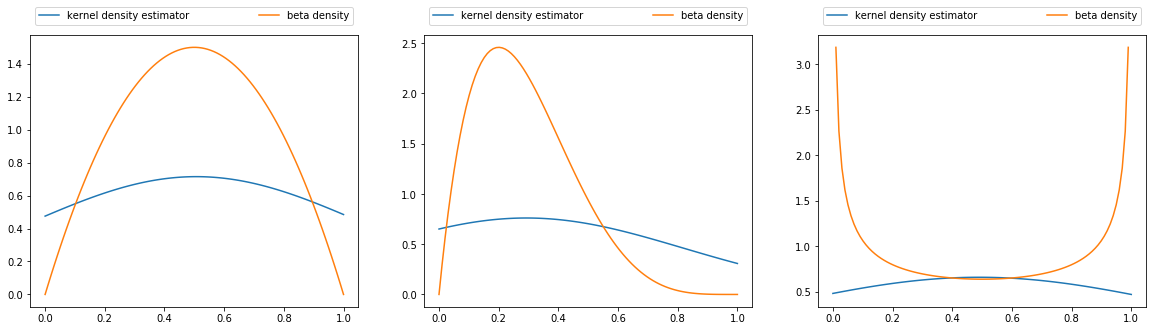

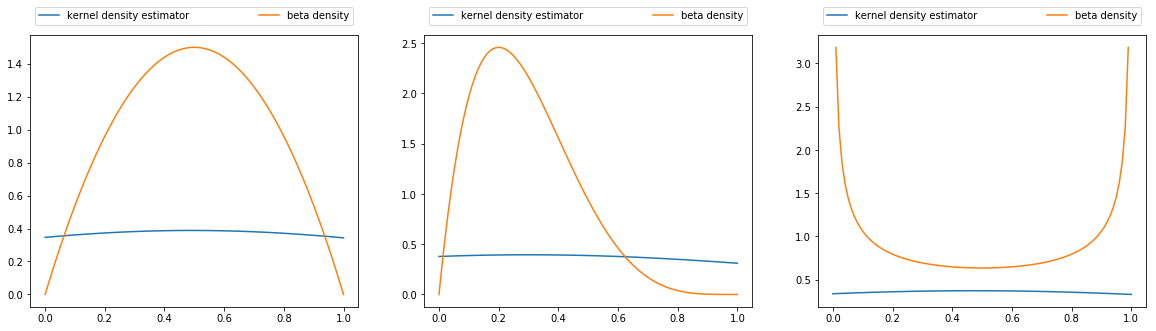

In [52]:
#Since the accleration is so diasppointing,We prefer not to use numba
#ϕ is the beta distribution 
n=100
α=[2,2,0.5]
β=[2,5,0.5]
x=np.linspace(0,1,100)
h=[0.05,0.25,0.5,1]
for h in h:
    fig,ax=plt.subplots(1,3,figsize=(20,5))
    bbox = (0., 1.02, 1., .102)
    legend_args = {'ncol': 2,
               'bbox_to_anchor': bbox,
               'loc': 3,
               'mode': 'expand'}
    j=0
    for a,b in zip(α,β):
        sample=beta.rvs(a,b,size=n)
        kernel=kernel_density_estimator(sample,h)
        estimator=[]
        for i in x:
            estimator.append(kernel.kernel_density(i))

        ax[j].plot(x,estimator,label='kernel density estimator')
        ax[j].plot(x,beta.pdf(x,a,b),label='beta density')
        ax[j].legend(**legend_args)
        j+=1
    plt.show()

## Comment:

###  In this part, we choose differnt bandwidth. In the first three plots, the blue curve is undersmoothed since it contains too many spurious data artifacts arising from using a bandwidth h = 0.05, which is too small. That means the variance is large. But the blue curve is close to the orange one, which means the bias is small. 
### In the last three plots, the blue curve is oversmoothed since using the bandwidth h = 1 obscures much of the underlying structure. That means the variance is small. But the blue curve is distant from the orange one, which means the bias is large. 

### Exercise 2

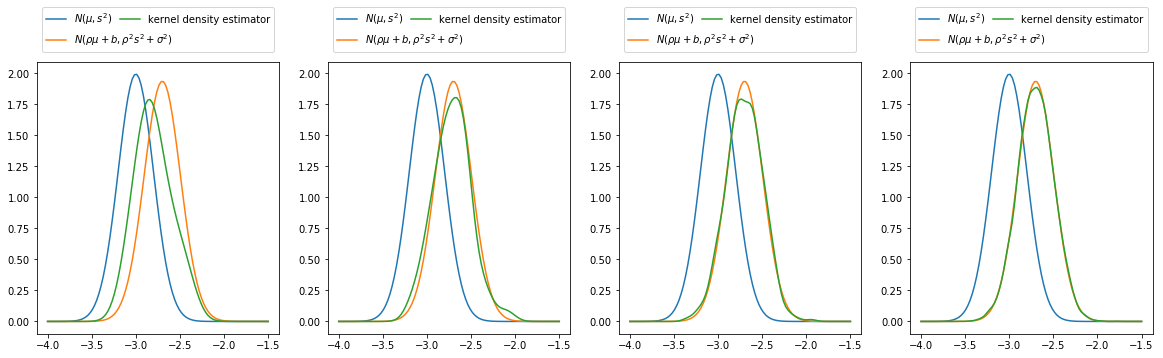

In [54]:
ρ=0.9
b=0.0
σ=0.1
μ=-3
s=0.2
x=np.linspace(-4,-1.5,100)
ψ_t=norm.pdf(x,μ,s)

#using the true distributions
μ1=ρ*μ+b
s1=(ρ**2*(s**2)+σ**2)**(1/2)
ψ_t0=norm.pdf(x,μ1,s1)

#using the rule  Xt+1=ρXt+b+σξt+1
fig,ax=plt.subplots(1,4,figsize=(20,5))
bbox = (0., 1.02, 1., .102)
legend_args = {'ncol': 2,
               'bbox_to_anchor': bbox,
               'loc': 3,
               'mode': 'expand'}

n=[10,100,1000,10000]
j=0
for n in n:
    #step 1
    Xt=norm.rvs(μ,s,n)
    #step 2
    error=norm.rvs(0,1,n)
    Xt1=ρ*Xt+b+σ*error
    #step 3
    kernel=kernel_density_estimator(Xt1)
    estimator=[]
    for i in x:
        estimator.append(kernel.kernel_density(i))

    ax[j].plot(x,ψ_t,label='$N(μ,s^2)$')
    ax[j].plot(x,ψ_t0,label='$ N(ρμ+b,ρ^2s^2+σ^2) $')
    ax[j].plot(x,estimator,label='kernel density estimator')
    ax[j].legend(**legend_args)
    j+=1
plt.show()

## Comment:

### We can see from the above plots as n becomes lager, the density estimate we abtain becomes closer to the theoretical distribution. When n equals to 10000, they almost overlap. So we can conclude that the simulation based estimate of $\psi_{t+1}$ does converge to the theoretical distribution 